In [87]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy import stats

try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# antiKstar

In [257]:

base_file_loc = '/media/jykim/T7/storage_b2/storage//massvetov2_pre_1ab_onlybkg/'
base_file_loc = '/media/jykim/T7/storage/01_recon/massvetov2_pre_1ab_onlybkg/'
# base_file_loc = '/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/'


phigamma_ccbar = base_file_loc + 'ccbar/recon_udst_*.root'
# phigamma_ccbar = base_file_loc + 'topo/generic_ccbar.root'
# phigamma_ccbar = base_file_loc + 'topo/resultfile/result_phi/standard.root'

phigamma_uubar = base_file_loc + 'uubar/recon_udst_*.root'
phigamma_ddbar = base_file_loc + 'ddbar/recon_udst_*.root'
phigamma_ssbar = base_file_loc + 'ssbar/recon_udst_*.root'
phigamma_charged = base_file_loc + 'charged/recon_udst_*.root'
phigamma_mixed = base_file_loc + 'mixed/recon_udst_*.root'
phigamma_taupair = base_file_loc + 'taupair/recon_udst_*.root'

In [258]:
base_filter=' D0_M>1.68 && D0_M<2.05 && abs(antiKstar_M - 0.89555) < 0.06 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
# base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
base_filter=' D0_M>1.8 && D0_M<1.9 && abs(antiKstar_M - 0.89555) < 0.06 && Dstarp_CMS_p>2.5'
base_filter=' D0_M>1.68 && D0_M<2.05 && abs(antiKstar_M - 0.89555) < 0.06 && abs(Dstarp_delM-(2.0103-1.8648))<0.00075 && Dstarp_CMS_p>2.5 && gamma_E>0.34 && Belle2Pi0Veto_75MeV>0.021'

# base_filter=' D0_M>1.8 && D0_M<1.9'
base_filter=' D0_M>1.68 && D0_M<2.05 && Belle2Pi0Veto_75MeV>0.021'
base_filter=' D0_M>1.68 && D0_M<2.05'
base_filter=' D0_M>1.68 && D0_M<2.05 && abs(antiKstar_M - 0.89555) < 0.06 && Dstarp_CMS_p>2.5'

# 
variables=['__experiment__', '__run__', '__event__','__ncandidates__','__candidate__','D0_M','D0_cosHel_0','antiKstar_M','Dstarp_Q','Dstarp_CMS_p','gamma_E','gamma_genMotherPDG','Dstarp_isSignal','Dstarp_delM','D0_flightDistance','D0_flightDistanceErr']
# variables+=['Pi0_Prob','Eta_Prob']
# variables += ['roe_pi0_InvM', 'pi0veto_Easym', 'pi0_soft_cosHelicityAngleMomentum' ,'pi0_veto_isSignal','Belle2Pi0Veto',\
#             'roe_pi0_InvM_50MeV', 'pi0veto_Easym_50MeV', 'pi0_soft_cosHelicityAngleMomentum_50MeV' ,'pi0_veto_isSignal_50MeV','Belle2Pi0Veto_50MeV',\
#             'roe_pi0_InvM_75MeV', 'pi0veto_Easym_75MeV', 'pi0_soft_cosHelicityAngleMomentum_75MeV' ,'pi0_veto_isSignal_75MeV','Belle2Pi0Veto_75MeV',\
#             'roe_pi0_InvM_100MeV', 'pi0veto_Easym_100MeV', 'pi0_soft_cosHelicityAngleMomentum_100MeV' ,'pi0_veto_isSignal_100MeV','Belle2Pi0Veto_100MeV',\
#             'roe_pi0_InvM_125MeV', 'pi0veto_Easym_125MeV', 'pi0_soft_cosHelicityAngleMomentum_125MeV' ,'pi0_veto_isSignal_125MeV','Belle2Pi0Veto_125MeV',\
#             'roe_pi0_InvM_150MeV', 'pi0veto_Easym_150MeV', 'pi0_soft_cosHelicityAngleMomentum_150MeV' ,'pi0_veto_isSignal_150MeV','Belle2Pi0Veto_150MeV',\
#             'roe_pi0_InvM_mask', 'pi0veto_Easym_mask', 'pi0_soft_cosHelicityAngleMomentum_mask' ,'pi0_veto_isSignal_mask','Belle2Pi0Veto_mask','gamma_genMotherPDG']
# variables+=['phi_MVA2']
variables += ['roe_pi0_InvM', 'pi0veto_Easym', 'pi0_soft_cosHelicityAngleMomentum' ,'pi0_veto_isSignal','Belle2Pi0Veto',\
              'roe_pi0_InvM_50MeV', 'pi0veto_Easym_50MeV', 'pi0_soft_cosHelicityAngleMomentum_50MeV' ,'pi0_veto_isSignal_50MeV','Belle2Pi0Veto_50MeV',\
            'roe_pi0_InvM_75MeV', 'pi0veto_Easym_75MeV', 'pi0_soft_cosHelicityAngleMomentum_75MeV' ,'pi0_veto_isSignal_75MeV','Belle2Pi0Veto_75MeV']
tree='antiKstar'
# tree='phi'

In [259]:
pd_phigamma_ccbar = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_uubar = get_pd(file=phigamma_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ddbar = get_pd(file=phigamma_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ssbar = get_pd(file=phigamma_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_charged = get_pd(file=phigamma_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_mixed = get_pd(file=phigamma_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_taupair = get_pd(file=phigamma_taupair, tree=tree,base_filter=base_filter,variables=variables)

In [260]:
pd_ccbar = pd_phigamma_ccbar.reset_index(drop=True)
pd_uubar = pd_phigamma_uubar.reset_index(drop=True)
pd_ddbar = pd_phigamma_ddbar.reset_index(drop=True)
pd_ssbar = pd_phigamma_ssbar.reset_index(drop=True)
pd_charged = pd_phigamma_charged.reset_index(drop=True)
pd_mixed = pd_phigamma_mixed.reset_index(drop=True)
pd_taupair = pd_phigamma_taupair.reset_index(drop=True)




In [261]:
numerator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_uubar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ddbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ssbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_charged[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_mixed[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_taupair[["__experiment__", "__run__", "__event__"]].drop_duplicates())
denominator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_uubar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ddbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ssbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_charged[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_mixed[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_taupair[["__experiment__", "__run__", "__event__"]]) 
print(numerator)
print(denominator)

multiplicity = numerator/denominator
print(multiplicity)

626950
685476
0.9146199137533626


In [262]:
# cut = 'abs(antiKstar_M - 0.89555) < 0.06'
# cut = 'Dstarp_CMS_p>2.5'
cut = 'abs(Dstarp_delM-(2.0103-1.8648))<0.00075'
cut = 'gamma_E>0.34'
# cut = 'Belle2Pi0Veto_75MeV>0.021'
N_cc, N_uu, N_dd, N_ss, N_charged, N_mixed, N_taupair = len(pd_ccbar), len(pd_uubar), len(pd_ddbar), len(pd_ssbar), len(pd_charged), len(pd_mixed), len(pd_taupair)

pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

N_cc_f, N_uu_f, N_dd_f, N_ss_f, N_charged_f, N_mixed_f, N_taupair_f = len(pd_ccbar), len(pd_uubar), len(pd_ddbar), len(pd_ssbar), len(pd_charged), len(pd_mixed), len(pd_taupair)


In [263]:
print(f'ccbar: {N_cc_f/N_cc:.4f}',f'uubar: {N_uu_f/N_uu:.4f}' ,f'ddbar: {N_dd_f/N_dd:.4f}',f'ssbar: {N_ss_f/N_ss:.4f}' \
     ,f'chargd: {N_charged_f/N_charged:.4f}',f'mixed: {N_mixed_f/N_mixed:.4f}',f'taupair: {N_taupair_f/N_taupair:.4f}', \
     f'total: {(N_cc_f + N_uu_f + N_dd_f + N_ss_f + N_charged_f + N_mixed_f + N_taupair_f)/(N_cc + N_uu + N_dd + N_ss + N_charged + N_mixed + N_taupair):.4f}' )


ccbar: 0.8598 uubar: 0.8266 ddbar: 0.8217 ssbar: 0.7672 chargd: 0.9233 mixed: 0.9296 taupair: 0.6667 total: 0.8570


In [268]:
half_1_sigMC = '/media/jykim/T7/storage/01_recon/antiKstar/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_antiKstar_*.root'

# base_filter='D0_M>1.8 && D0_M<1.9  && abs(Phi_M - 1.0195)< 0.011 && abs(Dstarp_Q-0.00593)<0.0006'
base_filter=' D0_M>1.68 && D0_M<2.05 && abs(antiKstar_M - 0.89555) < 0.06 && Dstarp_CMS_p>2.5'
# base_filter+= ' && Dstarp_isSignal!=1'
# base_filter='D0_M>1.68 && D0_M<2.05 && Dstarp_isSignal!=1'
tree='antiKstar'
base_filter += '&& Dstarp_isSignal==1'
pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)

In [269]:
cut = 'Dstarp_CMS_p>2.5'
# cut = 'abs(antiKstar_M - 0.89555) < 0.06'
cut = 'abs(Dstarp_delM-(2.0103-1.8648))<0.00075'
cut = 'gamma_E>0.34'
# cut = 'Belle2Pi0Veto_75MeV>0.021'

sig_eff = len(pd_half_1_sigMC.query(cut))/len(pd_half_1_sigMC)
print(f'signal: {sig_eff:.4f}')

signal: 0.9856


[    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0. 31568. 32045.
 31790. 32432. 33364. 34790. 36140. 39078. 42181. 46237. 50987. 54388.
 56534. 55810. 54494. 52712. 50650. 48187. 46055. 44343. 42768. 41288.
 40210. 39357.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.]
fitst_bin_entries=0.0


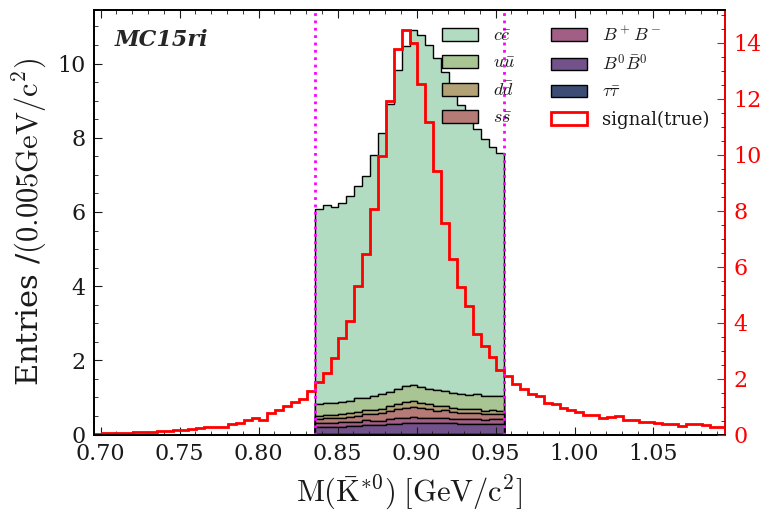

In [82]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'antiKstar_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

scale = 1
xrange = (0.89555 - 0.20, 0.89555+0.20)# xrange = (1.8,1.9)
nbins = 80
xlabel = r"$\mathrm{M(\bar{K}^{*0})}$"


fig = plt.figure()

MC_stack_plot_density(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c^2")


# half_1_sigMC = '/media/jykim/T7/storage/01_recon/phi/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_phi_*.root'
# # base_filter='D0_M>1.8 && D0_M<1.9  && abs(Phi_M - 1.0195)< 0.011 && abs(Dstarp_Q-0.00593)<0.0006'
# # base_filter='D0_M>1.68 && D0_M<2.05 && Dstarp_isSignal==1'
# base_filter += '&& Dstarp_isSignal==1'
pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)
ax = plt.gca()
ax2 = ax.twinx()
plt.hist(pd_half_1_sigMC[var], bins=np.linspace(*xrange,nbins+1),histtype='step',color='r',density=True,lw='2',label='signal(true)');
ax2.spines['right'].set_color('r')
ax2.tick_params(colors='red')
fig.legend(loc='upper right',prop={'size':13}, ncol = 2,  bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

plt.axvline(x=0.89555 - 0.06,  color='magenta', linestyle='dotted',lw=2)
plt.axvline(x=0.89555 + 0.06,  color='magenta', linestyle='dotted',lw=2)

plt.tight_layout()
plt.savefig('MC15ri_antiKstar_pre_antiKstar_M.png')

[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 2.520e+03 2.543e+03 2.531e+03 2.498e+03
 2.492e+03 2.524e+03 2.407e+03 2.397e+03 2.494e+03 2.383e+03 2.357e+03
 2.328e+03 2.261e+03 2.286e+03 2.242e+03 2.201e+03 2.130e+03 2.085e+03
 1.998e+03 1.921e+03 1.848e+03 1.864e+03 1.789e+03 1.757e+03 1.637e+03
 1.561e+03 1.495e+03 1.491e+03 1.402e+03 1.350e+03 1.233e+03 1.217e+03
 1.150e+03 1.079e+03 9.770e+02 9.510e+02 8.590e+02 7.730e+02 6.800e+02
 6.010e+02 5.450e+02 4.930e+02 4.080e+02 3.350e+02 2.270e+02 1.330e+02
 5.600e+01 1.900e+01 2.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00]
fitst_bin_entries=0.0


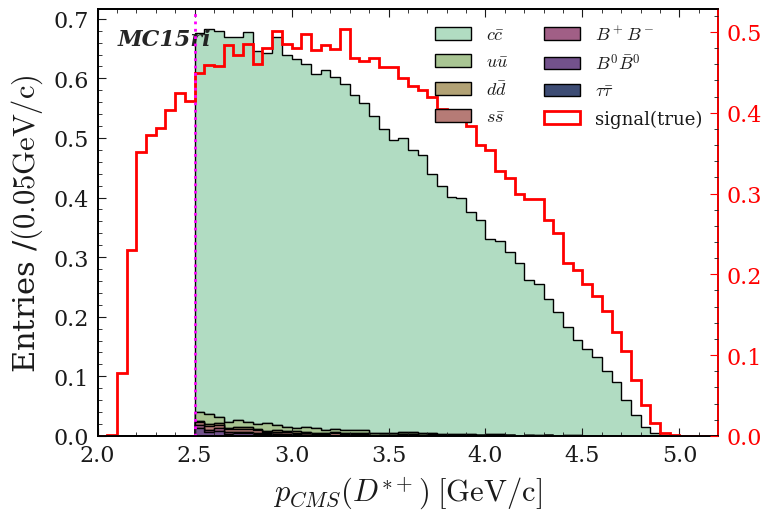

In [19]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'Dstarp_CMS_p'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

scale = 1
xrange = (2, 5.2)
# xrange = (1.8,1.9)
nbins = 64
xlabel = "$p_{CMS}(D^{*+})$"


fig = plt.figure()

MC_stack_plot_density(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c")


# half_1_sigMC = '/media/jykim/T7/storage/01_recon/phi/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_phi_*.root'
# # base_filter='D0_M>1.8 && D0_M<1.9  && abs(Phi_M - 1.0195)< 0.011 && abs(Dstarp_Q-0.00593)<0.0006'
# # base_filter='D0_M>1.68 && D0_M<2.05 && Dstarp_isSignal==1'
# base_filter += '&& Dstarp_isSignal==1'

pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)
ax = plt.gca()
ax2 = ax.twinx()
plt.hist(pd_half_1_sigMC[var], bins=np.linspace(*xrange,nbins+1),histtype='step',color='r',density=True,lw='2',label='signal(true)');
ax2.spines['right'].set_color('r')
ax2.tick_params(colors='red')
fig.legend(loc='upper right',prop={'size':13}, ncol = 2,  bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

plt.axvline(x=2.5,  color='magenta', linestyle='dotted',lw=2)
plt.tight_layout()
plt.savefig('MC15ri_antiKstar_pre_pCMS.png')

# phi

In [198]:

base_file_loc = '/media/jykim/T7/storage_b2/storage//massvetov2_pre_1ab_onlybkg/'
base_file_loc = '/media/jykim/T7/storage/01_recon/massvetov2_pre_1ab_onlybkg/'
# base_file_loc = '/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/'


phigamma_ccbar = base_file_loc + 'ccbar/recon_udst_*.root'
# phigamma_ccbar = base_file_loc + 'topo/generic_ccbar.root'
# phigamma_ccbar = base_file_loc + 'topo/resultfile/result_phi/standard.root'

phigamma_uubar = base_file_loc + 'uubar/recon_udst_*.root'
phigamma_ddbar = base_file_loc + 'ddbar/recon_udst_*.root'
phigamma_ssbar = base_file_loc + 'ssbar/recon_udst_*.root'
phigamma_charged = base_file_loc + 'charged/recon_udst_*.root'
phigamma_mixed = base_file_loc + 'mixed/recon_udst_*.root'
phigamma_taupair = base_file_loc + 'taupair/recon_udst_*.root'

In [284]:
base_filter=' D0_M>1.68 && D0_M<2.05 && abs(antiKstar_M - 0.89555) < 0.06 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
# base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
base_filter=' D0_M>1.8 && D0_M<1.9 && abs(antiKstar_M - 0.89555) < 0.06 && Dstarp_CMS_p>2.5'
base_filter=' D0_M>1.68 && D0_M<2.05 && abs(antiKstar_M - 0.89555) < 0.06 && abs(Dstarp_delM-(2.0103-1.8648))<0.00075 && Dstarp_CMS_p>2.5 && gamma_E>0.34 && Belle2Pi0Veto_75MeV>0.021'

# base_filter=' D0_M>1.8 && D0_M<1.9'
base_filter=' D0_M>1.68 && D0_M<2.05 && Belle2Pi0Veto_75MeV>0.021'
base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && Dstarp_CMS_p>2.5'

# 
variables=['__experiment__', '__run__', '__event__','__ncandidates__','__candidate__','D0_M','D0_cosHel_0','Phi_M','Dstarp_Q','Dstarp_CMS_p','gamma_E','gamma_genMotherPDG','Dstarp_isSignal','Dstarp_delM','D0_flightDistance','D0_flightDistanceErr']
# variables+=['Pi0_Prob','Eta_Prob']
# variables += ['roe_pi0_InvM', 'pi0veto_Easym', 'pi0_soft_cosHelicityAngleMomentum' ,'pi0_veto_isSignal','Belle2Pi0Veto',\
#             'roe_pi0_InvM_50MeV', 'pi0veto_Easym_50MeV', 'pi0_soft_cosHelicityAngleMomentum_50MeV' ,'pi0_veto_isSignal_50MeV','Belle2Pi0Veto_50MeV',\
#             'roe_pi0_InvM_75MeV', 'pi0veto_Easym_75MeV', 'pi0_soft_cosHelicityAngleMomentum_75MeV' ,'pi0_veto_isSignal_75MeV','Belle2Pi0Veto_75MeV',\
#             'roe_pi0_InvM_100MeV', 'pi0veto_Easym_100MeV', 'pi0_soft_cosHelicityAngleMomentum_100MeV' ,'pi0_veto_isSignal_100MeV','Belle2Pi0Veto_100MeV',\
#             'roe_pi0_InvM_125MeV', 'pi0veto_Easym_125MeV', 'pi0_soft_cosHelicityAngleMomentum_125MeV' ,'pi0_veto_isSignal_125MeV','Belle2Pi0Veto_125MeV',\
#             'roe_pi0_InvM_150MeV', 'pi0veto_Easym_150MeV', 'pi0_soft_cosHelicityAngleMomentum_150MeV' ,'pi0_veto_isSignal_150MeV','Belle2Pi0Veto_150MeV',\
#             'roe_pi0_InvM_mask', 'pi0veto_Easym_mask', 'pi0_soft_cosHelicityAngleMomentum_mask' ,'pi0_veto_isSignal_mask','Belle2Pi0Veto_mask','gamma_genMotherPDG']
# variables+=['phi_MVA2']
variables += ['roe_pi0_InvM', 'pi0veto_Easym', 'pi0_soft_cosHelicityAngleMomentum' ,'pi0_veto_isSignal','Belle2Pi0Veto',\
              'roe_pi0_InvM_50MeV', 'pi0veto_Easym_50MeV', 'pi0_soft_cosHelicityAngleMomentum_50MeV' ,'pi0_veto_isSignal_50MeV','Belle2Pi0Veto_50MeV',\
            'roe_pi0_InvM_75MeV', 'pi0veto_Easym_75MeV', 'pi0_soft_cosHelicityAngleMomentum_75MeV' ,'pi0_veto_isSignal_75MeV','Belle2Pi0Veto_75MeV']
# tree='antiKstar'
tree='phi'

In [200]:
pd_phigamma_ccbar = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_uubar = get_pd(file=phigamma_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ddbar = get_pd(file=phigamma_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ssbar = get_pd(file=phigamma_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_charged = get_pd(file=phigamma_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_mixed = get_pd(file=phigamma_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_taupair = get_pd(file=phigamma_taupair, tree=tree,base_filter=base_filter,variables=variables)

In [220]:
pd_ccbar = pd_phigamma_ccbar.reset_index(drop=True)
pd_uubar = pd_phigamma_uubar.reset_index(drop=True)
pd_ddbar = pd_phigamma_ddbar.reset_index(drop=True)
pd_ssbar = pd_phigamma_ssbar.reset_index(drop=True)
pd_charged = pd_phigamma_charged.reset_index(drop=True)
pd_mixed = pd_phigamma_mixed.reset_index(drop=True)
pd_taupair = pd_phigamma_taupair.reset_index(drop=True)




In [221]:
numerator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_uubar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ddbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ssbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_charged[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_mixed[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_taupair[["__experiment__", "__run__", "__event__"]].drop_duplicates())
denominator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_uubar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ddbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ssbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_charged[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_mixed[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_taupair[["__experiment__", "__run__", "__event__"]]) 
print(numerator)
print(denominator)

multiplicity = numerator/denominator
print(multiplicity)

36335
38842
0.9354564646516658


In [222]:
cut = 'abs(Phi_M - 1.0195) < 0.011'
# cut = 'Dstarp_CMS_p>2.5'
cut = 'abs(Dstarp_delM-(2.0103-1.8648))<0.0008'
cut = 'gamma_E>0.48'
cut = 'Belle2Pi0Veto_75MeV>0.023'
N_cc, N_uu, N_dd, N_ss, N_charged, N_mixed, N_taupair = len(pd_ccbar), len(pd_uubar), len(pd_ddbar), len(pd_ssbar), len(pd_charged), len(pd_mixed), len(pd_taupair)

pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

N_cc_f, N_uu_f, N_dd_f, N_ss_f, N_charged_f, N_mixed_f, N_taupair_f = len(pd_ccbar), len(pd_uubar), len(pd_ddbar), len(pd_ssbar), len(pd_charged), len(pd_mixed), len(pd_taupair)


In [223]:
print(f'ccbar: {N_cc_f/N_cc:.4f}',f'uubar: {N_uu_f/N_uu:.4f}' ,f'ddbar: {N_dd_f/N_dd:.4f}',f'ssbar: {N_ss_f/N_ss:.4f}' \
     ,f'chargd: {N_charged_f/N_charged:.4f}',f'mixed: {N_mixed_f/N_mixed:.4f}',f'taupair: {N_taupair_f/N_taupair:.4f}', \
     f'total: {(N_cc_f + N_uu_f + N_dd_f + N_ss_f + N_charged_f + N_mixed_f + N_taupair_f)/(N_cc + N_uu + N_dd + N_ss + N_charged + N_mixed + N_taupair):.4f}' )


ccbar: 0.3802 uubar: 0.4342 ddbar: 0.4327 ssbar: 0.4445 chargd: 0.4481 mixed: 0.4425 taupair: 0.5000 total: 0.3897


In [289]:
half_1_sigMC = '/media/jykim/T7/storage/01_recon/phi/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_phi_*.root'

# base_filter='D0_M>1.8 && D0_M<1.9  && abs(Phi_M - 1.0195)< 0.011 && abs(Dstarp_Q-0.00593)<0.0006'
# base_filter='D0_M>1.68 && D0_M<2.05 && Dstarp_isSignal!=1'
base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && Dstarp_CMS_p>2.5'

tree='phi'
base_filter += '&& Dstarp_isSignal!=1'
pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)

In [290]:
cut = 'Dstarp_CMS_p>2.5'
cut = 'abs(Phi_M - 1.0195) < 0.011'
cut = 'abs(Dstarp_delM-(2.0103-1.8648))<0.0008'
cut = 'gamma_E>0.48'
# cut = 'Belle2Pi0Veto_75MeV>0.023'

sig_eff = len(pd_half_1_sigMC.query(cut))/len(pd_half_1_sigMC)
print(f'signal: {sig_eff:.4f}')

signal: 0.5679


[    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0. 31568. 32045.
 31790. 32432. 33364. 34790. 36140. 39078. 42181. 46237. 50987. 54388.
 56534. 55810. 54494. 52712. 50650. 48187. 46055. 44343. 42768. 41288.
 40210. 39357.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.]
fitst_bin_entries=0.0


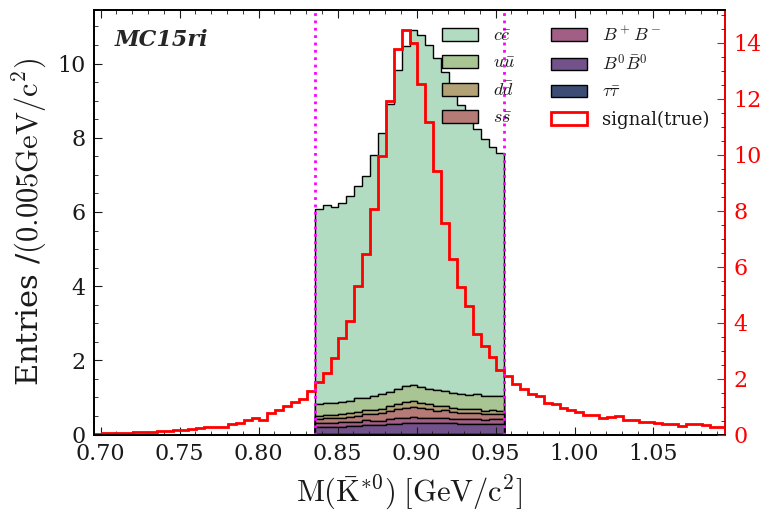

In [82]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'antiKstar_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

scale = 1
xrange = (0.89555 - 0.20, 0.89555+0.20)# xrange = (1.8,1.9)
nbins = 80
xlabel = r"$\mathrm{M(\bar{K}^{*0})}$"


fig = plt.figure()

MC_stack_plot_density(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c^2")


# half_1_sigMC = '/media/jykim/T7/storage/01_recon/phi/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_phi_*.root'
# # base_filter='D0_M>1.8 && D0_M<1.9  && abs(Phi_M - 1.0195)< 0.011 && abs(Dstarp_Q-0.00593)<0.0006'
# # base_filter='D0_M>1.68 && D0_M<2.05 && Dstarp_isSignal==1'
# base_filter += '&& Dstarp_isSignal==1'
pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)
ax = plt.gca()
ax2 = ax.twinx()
plt.hist(pd_half_1_sigMC[var], bins=np.linspace(*xrange,nbins+1),histtype='step',color='r',density=True,lw='2',label='signal(true)');
ax2.spines['right'].set_color('r')
ax2.tick_params(colors='red')
fig.legend(loc='upper right',prop={'size':13}, ncol = 2,  bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

plt.axvline(x=0.89555 - 0.06,  color='magenta', linestyle='dotted',lw=2)
plt.axvline(x=0.89555 + 0.06,  color='magenta', linestyle='dotted',lw=2)

plt.tight_layout()
plt.savefig('MC15ri_antiKstar_pre_antiKstar_M.png')

[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 2.520e+03 2.543e+03 2.531e+03 2.498e+03
 2.492e+03 2.524e+03 2.407e+03 2.397e+03 2.494e+03 2.383e+03 2.357e+03
 2.328e+03 2.261e+03 2.286e+03 2.242e+03 2.201e+03 2.130e+03 2.085e+03
 1.998e+03 1.921e+03 1.848e+03 1.864e+03 1.789e+03 1.757e+03 1.637e+03
 1.561e+03 1.495e+03 1.491e+03 1.402e+03 1.350e+03 1.233e+03 1.217e+03
 1.150e+03 1.079e+03 9.770e+02 9.510e+02 8.590e+02 7.730e+02 6.800e+02
 6.010e+02 5.450e+02 4.930e+02 4.080e+02 3.350e+02 2.270e+02 1.330e+02
 5.600e+01 1.900e+01 2.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00]
fitst_bin_entries=0.0


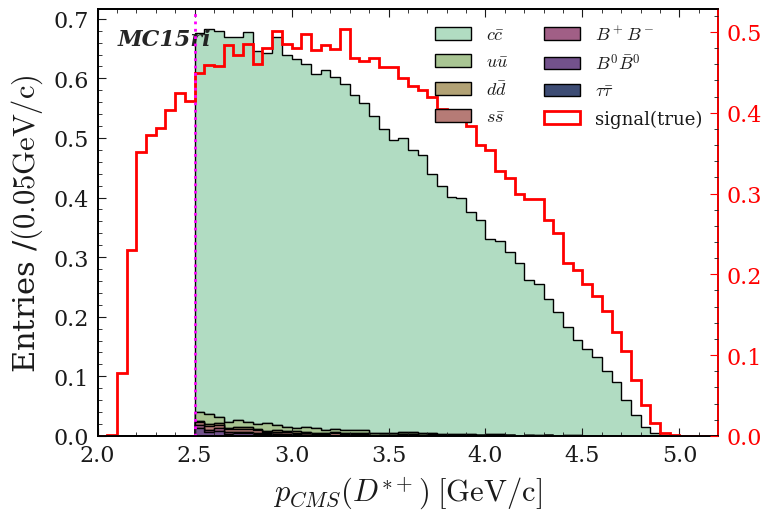

In [19]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'Dstarp_CMS_p'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

scale = 1
xrange = (2, 5.2)
# xrange = (1.8,1.9)
nbins = 64
xlabel = "$p_{CMS}(D^{*+})$"


fig = plt.figure()

MC_stack_plot_density(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c")


# half_1_sigMC = '/media/jykim/T7/storage/01_recon/phi/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_phi_*.root'
# # base_filter='D0_M>1.8 && D0_M<1.9  && abs(Phi_M - 1.0195)< 0.011 && abs(Dstarp_Q-0.00593)<0.0006'
# # base_filter='D0_M>1.68 && D0_M<2.05 && Dstarp_isSignal==1'
# base_filter += '&& Dstarp_isSignal==1'

pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)
ax = plt.gca()
ax2 = ax.twinx()
plt.hist(pd_half_1_sigMC[var], bins=np.linspace(*xrange,nbins+1),histtype='step',color='r',density=True,lw='2',label='signal(true)');
ax2.spines['right'].set_color('r')
ax2.tick_params(colors='red')
fig.legend(loc='upper right',prop={'size':13}, ncol = 2,  bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

plt.axvline(x=2.5,  color='magenta', linestyle='dotted',lw=2)
plt.tight_layout()
plt.savefig('MC15ri_antiKstar_pre_pCMS.png')

# rho

In [270]:

base_file_loc = '/media/jykim/T7/storage_b2/storage//massvetov2_pre_1ab_onlybkg/'
base_file_loc = '/media/jykim/T7/storage/01_recon/massvetov2_pre_1ab_onlybkg/'
# base_file_loc = '/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/'


phigamma_ccbar = base_file_loc + 'ccbar/recon_udst_*.root'
# phigamma_ccbar = base_file_loc + 'topo/generic_ccbar.root'
# phigamma_ccbar = base_file_loc + 'topo/resultfile/result_phi/standard.root'

phigamma_uubar = base_file_loc + 'uubar/recon_udst_*.root'
phigamma_ddbar = base_file_loc + 'ddbar/recon_udst_*.root'
phigamma_ssbar = base_file_loc + 'ssbar/recon_udst_*.root'
phigamma_charged = base_file_loc + 'charged/recon_udst_*.root'
phigamma_mixed = base_file_loc + 'mixed/recon_udst_*.root'
phigamma_taupair = base_file_loc + 'taupair/recon_udst_*.root'

In [271]:
base_filter=' D0_M>1.68 && D0_M<2.05 && abs(antiKstar_M - 0.89555) < 0.06 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
# base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
base_filter=' D0_M>1.8 && D0_M<1.9 && abs(antiKstar_M - 0.89555) < 0.06 && Dstarp_CMS_p>2.5'
base_filter=' D0_M>1.68 && D0_M<2.05 && abs(antiKstar_M - 0.89555) < 0.06 && abs(Dstarp_delM-(2.0103-1.8648))<0.00075 && Dstarp_CMS_p>2.5 && gamma_E>0.34 && Belle2Pi0Veto_75MeV>0.021'

# base_filter=' D0_M>1.8 && D0_M<1.9'
base_filter=' D0_M>1.68 && D0_M<2.05 && Belle2Pi0Veto_75MeV>0.021'
base_filter=' D0_M>1.68 && D0_M<2.05'
base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Rho_M - 0.77526 ) < 0.15 &&  Dstarp_CMS_p>2.5'

# 
variables=['__experiment__', '__run__', '__event__','__ncandidates__','__candidate__','D0_M','D0_cosHel_0','Rho_M','Dstarp_Q','Dstarp_CMS_p','gamma_E','gamma_genMotherPDG','Dstarp_isSignal','Dstarp_delM','D0_flightDistance','D0_flightDistanceErr']
# variables+=['Pi0_Prob','Eta_Prob']
# variables += ['roe_pi0_InvM', 'pi0veto_Easym', 'pi0_soft_cosHelicityAngleMomentum' ,'pi0_veto_isSignal','Belle2Pi0Veto',\
#             'roe_pi0_InvM_50MeV', 'pi0veto_Easym_50MeV', 'pi0_soft_cosHelicityAngleMomentum_50MeV' ,'pi0_veto_isSignal_50MeV','Belle2Pi0Veto_50MeV',\
#             'roe_pi0_InvM_75MeV', 'pi0veto_Easym_75MeV', 'pi0_soft_cosHelicityAngleMomentum_75MeV' ,'pi0_veto_isSignal_75MeV','Belle2Pi0Veto_75MeV',\
#             'roe_pi0_InvM_100MeV', 'pi0veto_Easym_100MeV', 'pi0_soft_cosHelicityAngleMomentum_100MeV' ,'pi0_veto_isSignal_100MeV','Belle2Pi0Veto_100MeV',\
#             'roe_pi0_InvM_125MeV', 'pi0veto_Easym_125MeV', 'pi0_soft_cosHelicityAngleMomentum_125MeV' ,'pi0_veto_isSignal_125MeV','Belle2Pi0Veto_125MeV',\
#             'roe_pi0_InvM_150MeV', 'pi0veto_Easym_150MeV', 'pi0_soft_cosHelicityAngleMomentum_150MeV' ,'pi0_veto_isSignal_150MeV','Belle2Pi0Veto_150MeV',\
#             'roe_pi0_InvM_mask', 'pi0veto_Easym_mask', 'pi0_soft_cosHelicityAngleMomentum_mask' ,'pi0_veto_isSignal_mask','Belle2Pi0Veto_mask','gamma_genMotherPDG']
# variables+=['phi_MVA2']
variables += ['roe_pi0_InvM', 'pi0veto_Easym', 'pi0_soft_cosHelicityAngleMomentum' ,'pi0_veto_isSignal','Belle2Pi0Veto',\
              'roe_pi0_InvM_50MeV', 'pi0veto_Easym_50MeV', 'pi0_soft_cosHelicityAngleMomentum_50MeV' ,'pi0_veto_isSignal_50MeV','Belle2Pi0Veto_50MeV',\
            'roe_pi0_InvM_75MeV', 'pi0veto_Easym_75MeV', 'pi0_soft_cosHelicityAngleMomentum_75MeV' ,'pi0_veto_isSignal_75MeV','Belle2Pi0Veto_75MeV']
# tree='antiKstar'
tree='rho'

In [272]:
pd_phigamma_ccbar = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_uubar = get_pd(file=phigamma_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ddbar = get_pd(file=phigamma_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ssbar = get_pd(file=phigamma_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_charged = get_pd(file=phigamma_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_mixed = get_pd(file=phigamma_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_taupair = get_pd(file=phigamma_taupair, tree=tree,base_filter=base_filter,variables=variables)

In [273]:
pd_ccbar = pd_phigamma_ccbar.reset_index(drop=True)
pd_uubar = pd_phigamma_uubar.reset_index(drop=True)
pd_ddbar = pd_phigamma_ddbar.reset_index(drop=True)
pd_ssbar = pd_phigamma_ssbar.reset_index(drop=True)
pd_charged = pd_phigamma_charged.reset_index(drop=True)
pd_mixed = pd_phigamma_mixed.reset_index(drop=True)
pd_taupair = pd_phigamma_taupair.reset_index(drop=True)




In [274]:
numerator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_uubar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ddbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ssbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_charged[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_mixed[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_taupair[["__experiment__", "__run__", "__event__"]].drop_duplicates())
denominator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_uubar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ddbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ssbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_charged[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_mixed[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_taupair[["__experiment__", "__run__", "__event__"]]) 
print(numerator)
print(denominator)

multiplicity = numerator/denominator
print(multiplicity)

1050968
1203162
0.873504981041622


In [275]:
cut = 'abs(Rho_M - 0.77526 ) < 0.15'
# cut = 'Dstarp_CMS_p>2.5'
cut = 'abs(Dstarp_delM-(2.0103-1.8648))<0.0005'
cut = 'gamma_E>0.52'
# cut = 'Belle2Pi0Veto_75MeV>0.023'

N_cc, N_uu, N_dd, N_ss, N_charged, N_mixed, N_taupair = len(pd_ccbar), len(pd_uubar), len(pd_ddbar), len(pd_ssbar), len(pd_charged), len(pd_mixed), len(pd_taupair)

pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

N_cc_f, N_uu_f, N_dd_f, N_ss_f, N_charged_f, N_mixed_f, N_taupair_f = len(pd_ccbar), len(pd_uubar), len(pd_ddbar), len(pd_ssbar), len(pd_charged), len(pd_mixed), len(pd_taupair)


In [276]:
print(f'ccbar: {N_cc_f/N_cc:.4f}',f'uubar: {N_uu_f/N_uu:.4f}' ,f'ddbar: {N_dd_f/N_dd:.4f}',f'ssbar: {N_ss_f/N_ss:.4f}' \
     ,f'chargd: {N_charged_f/N_charged:.4f}',f'mixed: {N_mixed_f/N_mixed:.4f}',f'taupair: {N_taupair_f/N_taupair:.4f}', \
     f'total: {(N_cc_f + N_uu_f + N_dd_f + N_ss_f + N_charged_f + N_mixed_f + N_taupair_f)/(N_cc + N_uu + N_dd + N_ss + N_charged + N_mixed + N_taupair):.4f}' )


ccbar: 0.5132 uubar: 0.5577 ddbar: 0.5546 ssbar: 0.4841 chargd: 0.6448 mixed: 0.7123 taupair: 0.3616 total: 0.5348


In [279]:
half_1_sigMC = '/media/jykim/T7/storage/01_recon/rho/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_rho_*.root'

# base_filter='D0_M>1.8 && D0_M<1.9  && abs(Phi_M - 1.0195)< 0.011 && abs(Dstarp_Q-0.00593)<0.0006'
# base_filter='D0_M>1.68 && D0_M<2.05 && Dstarp_isSignal!=1'
base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Rho_M - 0.77526 ) < 0.15 &&  Dstarp_CMS_p>2.5'
base_filter += '&& Dstarp_isSignal==1'

tree='rho'
pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)

In [280]:
# cut = 'Dstarp_CMS_p>2.5'
# cut = 'abs(Rho_M - 0.77526 ) < 0.15'
cut = 'abs(Dstarp_delM-(2.0103-1.8648))<0.0005'
cut = 'gamma_E>0.52'
# cut = 'Belle2Pi0Veto_75MeV>0.023'

sig_eff = len(pd_half_1_sigMC.query(cut))/len(pd_half_1_sigMC)
print(f'signal: {sig_eff:.4f}')

signal: 0.9242


# omega

In [151]:

base_file_loc = '/media/jykim/T7/storage_b2/storage//massvetov2_pre_1ab_onlybkg/'
base_file_loc = '/media/jykim/T7/storage/01_recon/massvetov2_pre_1ab_onlybkg/'
base_file_loc = '/media/jykim/T7/storage/01_recon/massvetov2_pre_1ab_onlybkg_no_const/'


phigamma_ccbar = base_file_loc + 'ccbar/recon_udst_*.root'
# phigamma_ccbar = base_file_loc + 'topo/generic_ccbar.root'
# phigamma_ccbar = base_file_loc + 'topo/resultfile/result_phi/standard.root'

phigamma_uubar = base_file_loc + 'uubar/recon_udst_*.root'
phigamma_ddbar = base_file_loc + 'ddbar/recon_udst_*.root'
phigamma_ssbar = base_file_loc + 'ssbar/recon_udst_*.root'
phigamma_charged = base_file_loc + 'charged/recon_udst_*.root'
phigamma_mixed = base_file_loc + 'mixed/recon_udst_*.root'
phigamma_taupair = base_file_loc + 'taupair/recon_udst_*.root'

In [152]:
base_filter=' D0_M>1.68 && D0_M<2.05 && abs(antiKstar_M - 0.89555) < 0.06 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
# base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
base_filter=' D0_M>1.8 && D0_M<1.9 && abs(antiKstar_M - 0.89555) < 0.06 && Dstarp_CMS_p>2.5'
base_filter=' D0_M>1.68 && D0_M<2.05 && abs(antiKstar_M - 0.89555) < 0.06 && abs(Dstarp_delM-(2.0103-1.8648))<0.00075 && Dstarp_CMS_p>2.5 && gamma_E>0.34 && Belle2Pi0Veto_75MeV>0.021'

# base_filter=' D0_M>1.8 && D0_M<1.9'
base_filter=' D0_M>1.68 && D0_M<2.05 && Belle2Pi0Veto_75MeV>0.021'
base_filter=' D0_M>1.68 && D0_M<2.05'

# 
variables=['__experiment__', '__run__', '__event__','__ncandidates__','__candidate__','D0_M','D0_cosHel_0','Omega_M','Dstarp_Q','Dstarp_CMS_p','gamma_E','gamma_genMotherPDG','Dstarp_isSignal','Dstarp_delM','D0_flightDistance','D0_flightDistanceErr']
# variables+=['Pi0_Prob','Eta_Prob']
# variables += ['roe_pi0_InvM', 'pi0veto_Easym', 'pi0_soft_cosHelicityAngleMomentum' ,'pi0_veto_isSignal','Belle2Pi0Veto',\
#             'roe_pi0_InvM_50MeV', 'pi0veto_Easym_50MeV', 'pi0_soft_cosHelicityAngleMomentum_50MeV' ,'pi0_veto_isSignal_50MeV','Belle2Pi0Veto_50MeV',\
#             'roe_pi0_InvM_75MeV', 'pi0veto_Easym_75MeV', 'pi0_soft_cosHelicityAngleMomentum_75MeV' ,'pi0_veto_isSignal_75MeV','Belle2Pi0Veto_75MeV',\
#             'roe_pi0_InvM_100MeV', 'pi0veto_Easym_100MeV', 'pi0_soft_cosHelicityAngleMomentum_100MeV' ,'pi0_veto_isSignal_100MeV','Belle2Pi0Veto_100MeV',\
#             'roe_pi0_InvM_125MeV', 'pi0veto_Easym_125MeV', 'pi0_soft_cosHelicityAngleMomentum_125MeV' ,'pi0_veto_isSignal_125MeV','Belle2Pi0Veto_125MeV',\
#             'roe_pi0_InvM_150MeV', 'pi0veto_Easym_150MeV', 'pi0_soft_cosHelicityAngleMomentum_150MeV' ,'pi0_veto_isSignal_150MeV','Belle2Pi0Veto_150MeV',\
#             'roe_pi0_InvM_mask', 'pi0veto_Easym_mask', 'pi0_soft_cosHelicityAngleMomentum_mask' ,'pi0_veto_isSignal_mask','Belle2Pi0Veto_mask','gamma_genMotherPDG']
# variables+=['phi_MVA2']
variables += ['roe_pi0_InvM', 'pi0veto_Easym', 'pi0_soft_cosHelicityAngleMomentum' ,'pi0_veto_isSignal','Belle2Pi0Veto',\
              'roe_pi0_InvM_50MeV', 'pi0veto_Easym_50MeV', 'pi0_soft_cosHelicityAngleMomentum_50MeV' ,'pi0_veto_isSignal_50MeV','Belle2Pi0Veto_50MeV',\
            'roe_pi0_InvM_75MeV', 'pi0veto_Easym_75MeV', 'pi0_soft_cosHelicityAngleMomentum_75MeV' ,'pi0_veto_isSignal_75MeV','Belle2Pi0Veto_75MeV']
# tree='antiKstar'
tree='omega'

In [153]:
pd_phigamma_ccbar = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_uubar = get_pd(file=phigamma_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ddbar = get_pd(file=phigamma_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ssbar = get_pd(file=phigamma_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_charged = get_pd(file=phigamma_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_mixed = get_pd(file=phigamma_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_taupair = get_pd(file=phigamma_taupair, tree=tree,base_filter=base_filter,variables=variables)

In [154]:
pd_ccbar = pd_phigamma_ccbar.reset_index(drop=True)
pd_uubar = pd_phigamma_uubar.reset_index(drop=True)
pd_ddbar = pd_phigamma_ddbar.reset_index(drop=True)
pd_ssbar = pd_phigamma_ssbar.reset_index(drop=True)
pd_charged = pd_phigamma_charged.reset_index(drop=True)
pd_mixed = pd_phigamma_mixed.reset_index(drop=True)
pd_taupair = pd_phigamma_taupair.reset_index(drop=True)




In [155]:
numerator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_uubar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ddbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ssbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_charged[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_mixed[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_taupair[["__experiment__", "__run__", "__event__"]].drop_duplicates())
denominator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_uubar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ddbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ssbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_charged[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_mixed[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_taupair[["__experiment__", "__run__", "__event__"]]) 
print(numerator)
print(denominator)

multiplicity = numerator/denominator
print(multiplicity)

1110935
1657841
0.6701094978348345


In [162]:
cut = 'abs(Omega_M - 0.78265) < 0.025'
cut = 'Dstarp_CMS_p>2.5'

N_cc, N_uu, N_dd, N_ss, N_charged, N_mixed, N_taupair = len(pd_ccbar), len(pd_uubar), len(pd_ddbar), len(pd_ssbar), len(pd_charged), len(pd_mixed), len(pd_taupair)

pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

N_cc_f, N_uu_f, N_dd_f, N_ss_f, N_charged_f, N_mixed_f, N_taupair_f = len(pd_ccbar), len(pd_uubar), len(pd_ddbar), len(pd_ssbar), len(pd_charged), len(pd_mixed), len(pd_taupair)


In [163]:
print(f'ccbar: {N_cc_f/N_cc:.4f}',f'uubar: {N_uu_f/N_uu:.4f}' ,f'ddbar: {N_dd_f/N_dd:.4f}',f'ssbar: {N_ss_f/N_ss:.4f}' \
     ,f'chargd: {N_charged_f/N_charged:.4f}',f'mixed: {N_mixed_f/N_mixed:.4f}',f'taupair: {N_taupair_f/N_taupair:.4f}', \
     f'total: {(N_cc_f + N_uu_f + N_dd_f + N_ss_f + N_charged_f + N_mixed_f + N_taupair_f)/(N_cc + N_uu + N_dd + N_ss + N_charged + N_mixed + N_taupair):.4f}' )


ccbar: 0.5038 uubar: 0.5499 ddbar: 0.5484 ssbar: 0.4564 chargd: 0.2211 mixed: 0.2074 taupair: 0.6340 total: 0.4896


In [166]:
half_1_sigMC = '/media/jykim/T7/storage/01_recon/omega/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_omega_*.root'

# base_filter='D0_M>1.8 && D0_M<1.9  && abs(Phi_M - 1.0195)< 0.011 && abs(Dstarp_Q-0.00593)<0.0006'
base_filter='D0_M>1.68 && D0_M<2.05 && Dstarp_isSignal!=1'
tree='omega'
# base_filter += '&& Dstarp_isSignal==1'
pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)

In [167]:
cut = 'Dstarp_CMS_p>2.5'
# cut = 'abs(Omega_M - 0.78265) < 0.025'


sig_eff = len(pd_half_1_sigMC.query(cut))/len(pd_half_1_sigMC)
print(f'signal: {sig_eff:.4f}')

signal: 0.7411
